(20, 3)


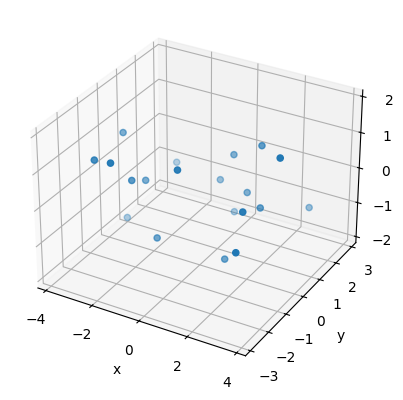

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting

from smt.sampling_methods import LHS


xlimits = np.array([[-4.0, 4.0], [-3.0, 3.0], [-2, 2]])
sampling = LHS(xlimits=xlimits)

num = 20
x = sampling(num)

print(x.shape)

fig = plt.figure()  # Create a new figure
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.scatter(x[:, 0], x[:, 1], x[:, 2], marker="o")  # Scatter plot

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


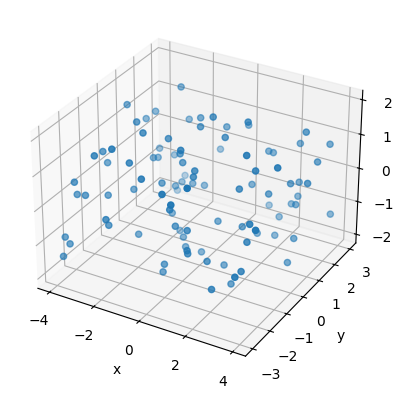

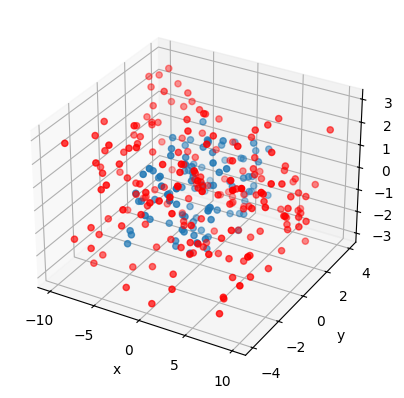

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS

# Initial xlimits
xlimits = np.array([[-4.0, 4.0], [-3.0, 3.0], [-2, 2]])

# Sampling with initial xlimits
sampling = LHS(xlimits=xlimits)
num_initial_points = 100
x_initial = sampling(num_initial_points)

# Display initial points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_initial[:, 0], x_initial[:, 1], x_initial[:, 2], marker="o")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# Expand xlimits
expanded_xlimits = np.array([[-10.0, 10.0], [-4.0, 4.0], [-3, 3]])

# Sampling with expanded xlimits
num_additional_points = 200
sampling_expanded = LHS(xlimits=expanded_xlimits)
x_expanded = sampling_expanded(num_additional_points)

# Concatenate initial and expanded points
x_combined = np.concatenate([x_initial, x_expanded])

# Display combined points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x_initial[:, 0], x_initial[:, 1], x_initial[:, 2], marker="o")
ax.scatter(x_expanded[:, 0], x_expanded[:, 1], x_expanded[:, 2], marker="o", c='r')

# ax.scatter(x_combined[:, 0], x_combined[:, 1], x_combined[:, 2], marker="o")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


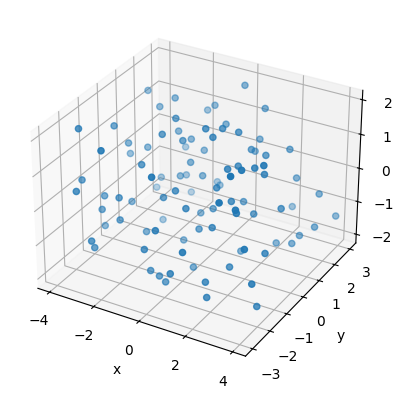

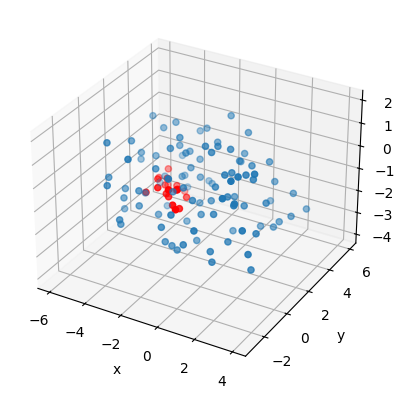

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS

# Initial xlimits
xlimits = np.array([[-4.0, 4.0], [-3.0, 3.0], [-2, 2]])

# Sampling with initial xlimits
sampling = LHS(xlimits=xlimits)
num_initial_points = 100
x_initial = sampling(num_initial_points)

# Display initial points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_initial[:, 0], x_initial[:, 1], x_initial[:, 2], marker="o")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# Expand xlimits with two regions for the first dimension
expanded_xlimits = np.array([[-6.0, -4.0], [4.0, 6.0], [-4.0, -3.0], [3.0, 4.0], [-3, -2], [2, 3]])

# Sampling with expanded xlimits
num_expanded_points = 20
sampling_expanded = LHS(xlimits=expanded_xlimits)
x_expanded = sampling_expanded(num_expanded_points)

# Display expanded points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_expanded[:, 0], x_expanded[:, 1], x_expanded[:, 2], marker="o")


ax.scatter(x_initial[:, 0], x_initial[:, 1], x_initial[:, 2], marker="o")
ax.scatter(x_expanded[:, 0], x_expanded[:, 1], x_expanded[:, 2], marker="o", c='r')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


100 100


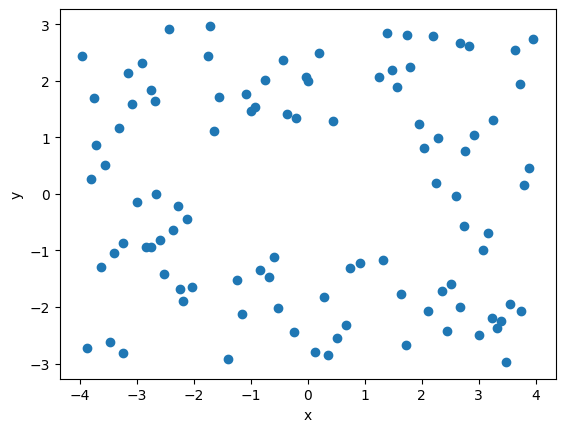

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from smt.sampling_methods import LHS

# Initial xlimits
xlimits = np.array([[-4.0, 4.0], [-3.0, 3.0]])

# Sampling with initial xlimits
sampling = LHS(xlimits=xlimits)
num_initial_points = 100
x_initial = sampling(num_initial_points)

# Define the condition for the region to omit
omit_region_condition = (x_initial[:, 0] >= -2) & (x_initial[:, 0] <= 2) & (x_initial[:, 1] >= -1) & (x_initial[:, 1] <= 1)

# Set a maximum number of iterations to avoid getting stuck indefinitely
max_iterations = 100

# Generate points in the omitted region until reaching the desired number of points or reaching max_iterations
iteration = 0
while np.sum(omit_region_condition) > 0 and iteration < max_iterations:
    additional_points = sampling(np.sum(omit_region_condition))
    x_initial[omit_region_condition] = additional_points
    omit_region_condition = (x_initial[:, 0] >= -2) & (x_initial[:, 0] <= 2) & (x_initial[:, 1] >= -1) & (x_initial[:, 1] <= 1)
    iteration += 1



# Define the condition for the first column (arr[:, 0])
x_condition = (x_initial[:, 0] <= -2) | (x_initial[:, 0] >= 2)
y_condition = (x_initial[:, 1] <= -1) | (x_initial[:, 1] >= 1)

# Use boolean indexing to keep rows where the first column satisfies the condition
x_initial = x_initial[x_condition | y_condition]




print(len(x_initial), num_initial_points)

# Display initial points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_initial[:, 0], x_initial[:, 1], marker="o")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


In [5]:
from instability_analysis.src.utils.plotting_sphere_disk import sphere_to_disk

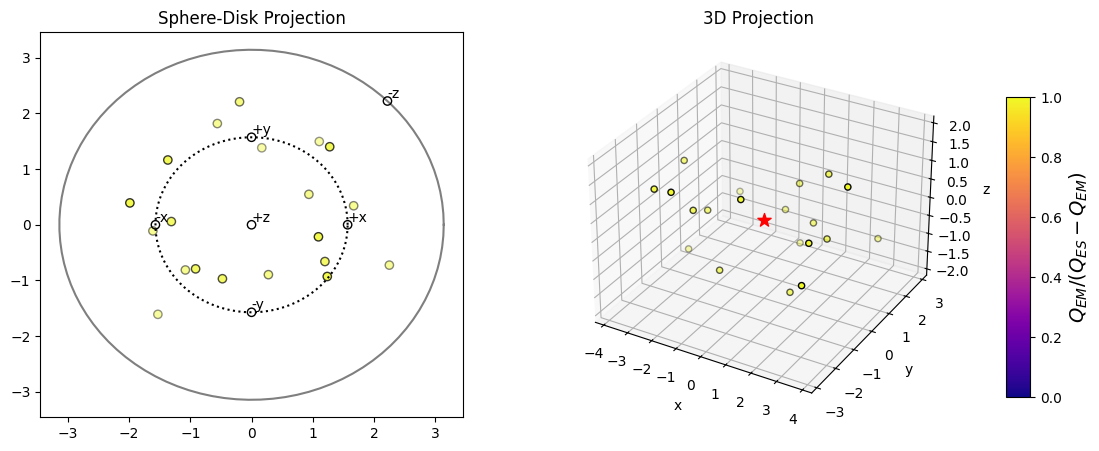

In [6]:
origin = (0,0,0)


points = (x[:, 0], x[:, 1], x[:, 2])



sphere_to_disk(points, origin=origin, plot_3D=True, dist_opacity_origin=True)

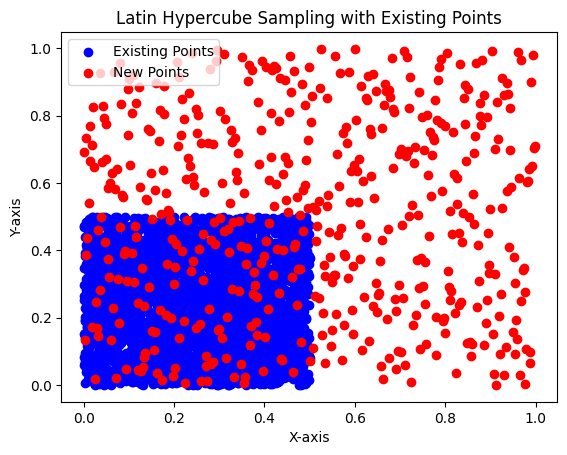

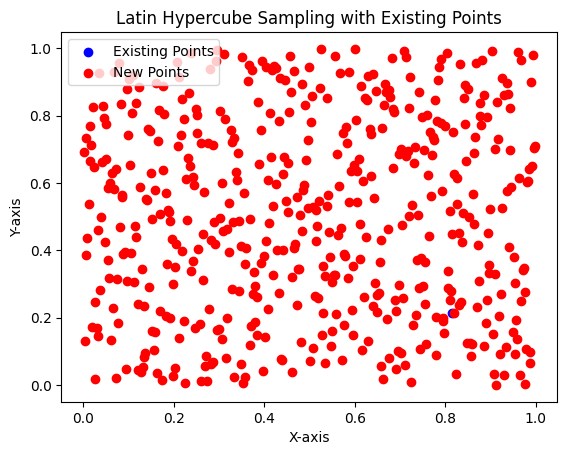

In [7]:
import numpy as np
from pyDOE import lhs
import matplotlib.pyplot as plt

def latin_hypercube_sampling(existing_points, num_samples, num_dimensions):
    if existing_points is not None and len(existing_points) > 0:
        existing_points = np.array(existing_points)
        existing_points = (existing_points - np.min(existing_points, axis=0)) / (np.max(existing_points, axis=0) - np.min(existing_points, axis=0))
    else:
        existing_points = np.array([])

    # Generate Latin hypercube samples
    new_points = lhs(num_dimensions, samples=num_samples, criterion='maximin')

    if existing_points.shape[0] > 0:
        new_points = existing_points.min(axis=0) + new_points * (existing_points.max(axis=0) - existing_points.min(axis=0))

    return new_points

def plot_points(existing_points, new_points):
    plt.scatter(existing_points[:, 0], existing_points[:, 1], color='blue', label='Existing Points')
    plt.scatter(new_points[:, 0], new_points[:, 1], color='red', label='New Points')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Latin Hypercube Sampling with Existing Points')
    plt.show()

# Example usage:
# existing_points = np.array([[0.2, 0.3], [0.6, 0.8], [0.9, 0.1]])
existing_points = np.random.rand(3000, 2)/2
num_samples = 500
num_dimensions = 2

new_points = latin_hypercube_sampling(existing_points, num_samples, num_dimensions)

# Plotting
plot_points(existing_points, new_points)

plot_points(np.random.rand(1, 2), new_points)


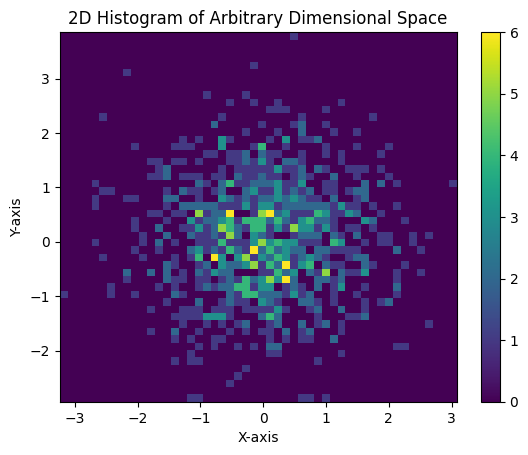

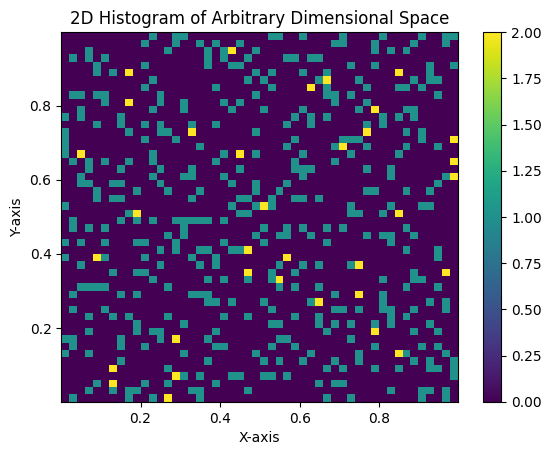

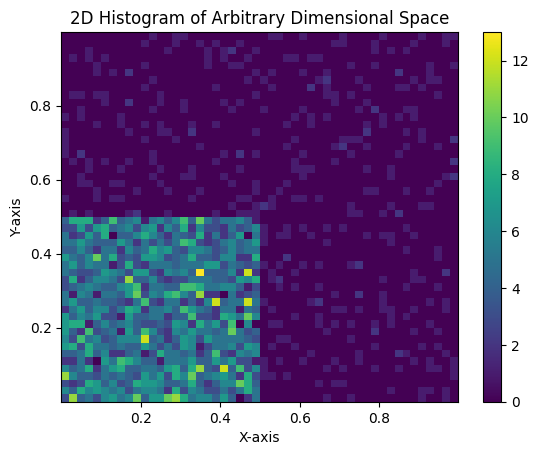

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_histogram(data, bins=50):
    x = data[:, 0]
    y = data[:, 1]

    plt.hist2d(x, y, bins=bins, cmap='viridis')
    plt.colorbar()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Histogram of Arbitrary Dimensional Space')
    plt.show()

# Generate some random 2D data for testing
np.random.seed(42)
data_2d = np.random.randn(1000, 2)


all_points = np.concatenate([existing_points, new_points])
# plot_points(existing_points, new_points)


# Plot the 2D histogram
plot_2d_histogram(data_2d)

plot_2d_histogram(new_points)

plot_2d_histogram(all_points)


(1000, 2)


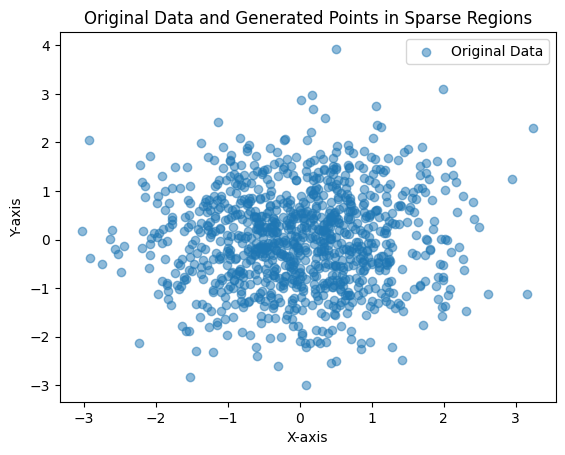

40


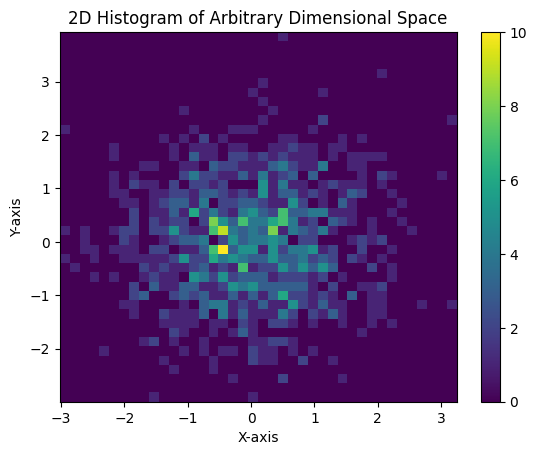

ValueError: object too deep for desired array

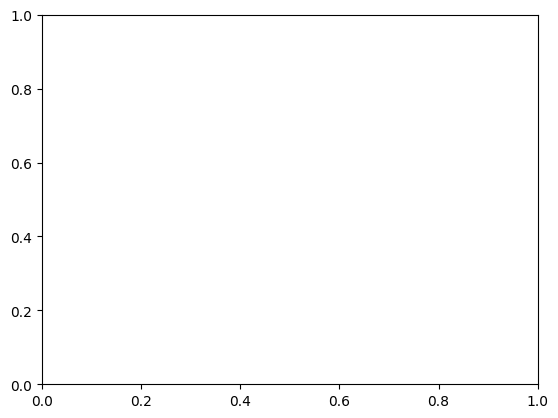

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def compute_2d_histogram(data, bins=20):
    x = data[:, 0]
    y = data[:, 1]

    histogram, x_edges, y_edges = np.histogram2d(x, y, bins=bins)
    return histogram, x_edges, y_edges


def plot_2d_histogram(data, bins=50):
    x = data[:, 0]
    y = data[:, 1]

    plt.hist2d(x, y, bins=bins, cmap='viridis')
    plt.colorbar()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('2D Histogram of Arbitrary Dimensional Space')
    plt.show()



def generate_points_in_sparse_regions(data, bins=20, num_points=1000):
    histogram, x_edges, y_edges = compute_2d_histogram(data, bins)

    # Normalize the histogram to get probabilities
    prob = histogram / np.sum(histogram)

    # Generate points based on the histogram probabilities
    x_random = np.random.choice((x_edges[:-1] + x_edges[1:]) / 2, num_points, p=np.sum(prob, axis=1))
    y_random = np.random.choice((y_edges[:-1] + y_edges[1:]) / 2, num_points, p=np.sum(prob, axis=0))

    generated_points = np.column_stack((x_random, y_random))
    return generated_points









# Generate some random 2D data for testing
# np.random.seed(42)
num_points = 1000
data_2d = np.random.randn(num_points, 2)

print(data_2d.shape)

# Generate more points in less dense regions
new_points = generate_points_in_sparse_regions(data_2d, bins=20, num_points=1000)

# Plot the original data and the new points
plt.scatter(data_2d[:, 0], data_2d[:, 1], label='Original Data', alpha=0.5)
# plt.scatter(new_points[:, 0], new_points[:, 1], label='Generated Points', alpha=0.5)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Original Data and Generated Points in Sparse Regions')
plt.show()


# bins = int(num_points/200)
bins = 20
dimension = 2

print(bins*dimension)

plot_2d_histogram(data_2d, bins*dimension)


histogram, x_edges, y_edges = compute_2d_histogram(data_2d, bins*dimension)




def plot_difference_histogram(data, bins=20):
    x = data[:, 0]
    y = data[:, 1]

    histogram, x_edges, y_edges = np.histogram2d(x, y, bins=bins)

    # Subtract the maximum value from each element in the histogram
    diff_histogram = np.max(histogram) - histogram

    # plt.hist2d(x, y, bins=bins, cmap='viridis')  # Plot the original data
    # plt.colorbar()
    # plt.xlabel('X-axis')
    # plt.ylabel('Y-axis')
    # plt.title('2D Histogram of Arbitrary Dimensional Space')
    # plt.show()

    # Plot the difference histogram
    plt.hist2d(x, y, bins=bins, weights=diff_histogram, cmap='brg')
    plt.colorbar()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Difference Histogram')
    plt.show()


plot_difference_histogram(data_2d, bins*dimension)